# __Flush experiment 16th Jan__

Looking at the data from a handful of the 2023 CF samples which were run as an experiment of flushing, initially just looking at top 10 phyla.

These runs were divided into 3 due to the MinION shutting down occassionaly, but this was unrelated to the flushing

Run in 24hr env

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import operator

In [3]:
#Read in the count data and add headers
read_count = pd.read_csv("/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Church_farm/flush_experiment_160124/PHIbase/fl_exp_all_taxaID_count.tsv", delimiter='\t', header=None)
read_count.columns = ['taxid', 'count', 'barcode']

#Read in the lineage data and only retain unique rows
lineage = pd.read_csv("/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Church_farm/flush_experiment_160124/PHIbase/fl_exp_taxaID_lineage_sep_head.csv")
# Aggregate the lineage dataframe to get unique taxid values
lineage_agg = lineage.groupby('taxid').first().reset_index()

In [4]:
# Merge the aggregated lineage dataframe with the read_count dataframe
read_count_lin = pd.merge(read_count, lineage_agg, on=['taxid'], how='left')

In [40]:
#normalised read count
total_counts = read_count_lin['count'].sum()
read_count_lin['count_per_1000'] = (read_count_lin['count'] / total_counts) * 1000

#relative abundance
read_count_lin['rel_abundance'] = read_count_lin['count'] / total_counts

,taxid,kindom,phylum,class,order,family,genus,species


Plot stacked bar chart of phylum relative abundance 

- Want to add the unclassified reads also
- But these aren't in the lineage dataset?

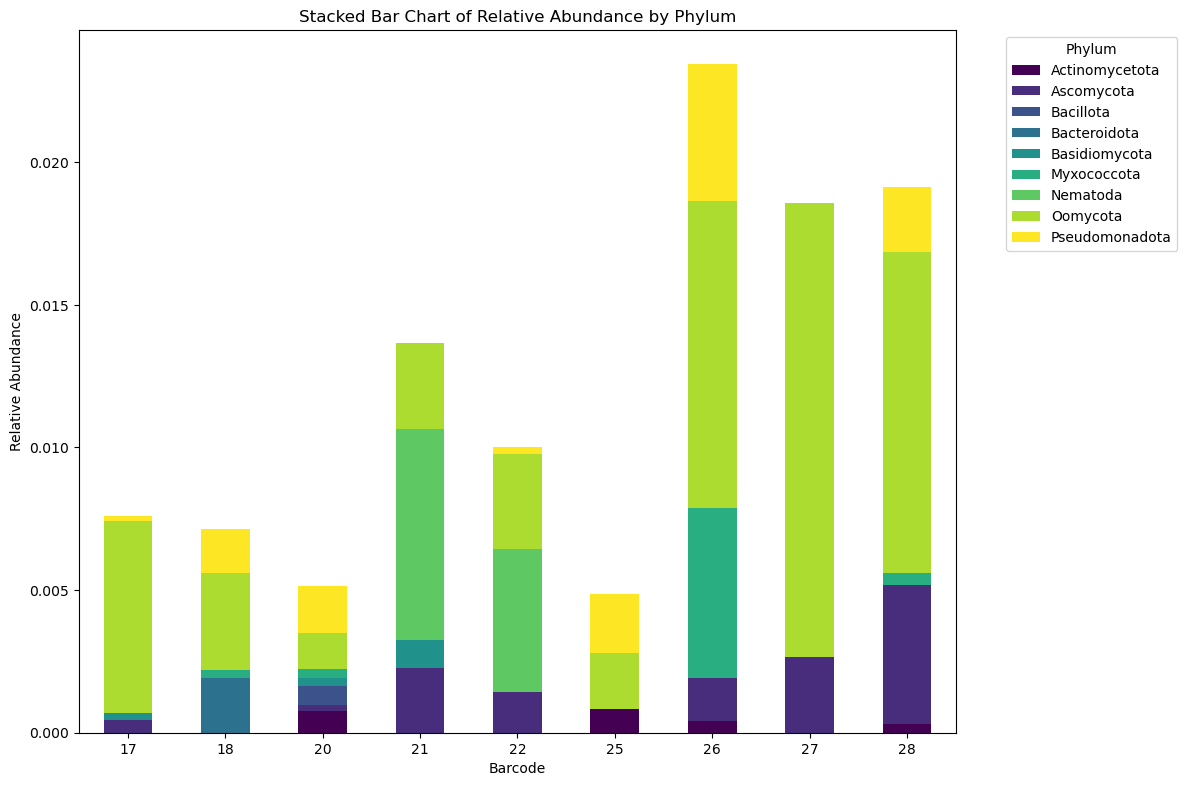

In [46]:
# Pivot the data to have phyla as columns
pivot_table = read_count_lin.pivot_table(index='barcode', columns='phylum', values='rel_abundance', fill_value=0)

# Plot the stacked bar chart using seaborn
plt.figure(figsize=(12, 8))
ax = pivot_table.plot(kind='bar', stacked=True, cmap='viridis', ax=plt.gca())

# Add labels and legend
plt.xlabel('Barcode')
plt.ylabel('Relative Abundance')
plt.title('Stacked Bar Chart of Relative Abundance by Phylum')
plt.legend(title='Phylum', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent overlapping
# Adjust x-axis labels rotation angle
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 
plt.show()

To get a more usable graph of species/genus would only want to plot top 10 per barcode

- Need to edit the script

# Metadata

In [4]:
meta = pd.read_csv("/Users/berelsom/Library/CloudStorage/OneDrive-NorwichBioScienceInstitutes/Air_Samples/Church_farm/flush_experiment_160124/flush_experiment_contig_stats.csv")

# Remove commas from specific columns
columns_with_commas = ['Basecalled reads', 'Passed filter & analysed', 'Classified reads', 'Unclassified reads']
meta[columns_with_commas] = meta[columns_with_commas].replace(',', '', regex=True).astype(int)

#replace too low with 0
meta['Initial DNA quantity (ug/nL)'] = meta['Initial DNA quantity (ug/nL)'].replace('too low', 0).astype('float64')



,Barcode,Sample,Initial DNA quantity (ug/nL),WGA BR kit(ug/nL),NumContigs,TotalSum,N50Length,Basecalled yield (Gb),Basecalled reads,Passed filter & analysed,Classified reads,Unclassified reads
0,17,1,0.000,7.22,43177,93366782,4768,0.093,43177,28420,5931,22489
1,18,5,0.000,34.30,94246,216443258,4889,0.216,94246,65330,35301,30029
2,20,12,0.000,10.60,102851,338545401,6225,0.339,102851,84877,59832,25045
3,21,13,0.681,8.27,113361,392292887,7049,0.392,113361,85642,10661,74981
4,22,14,0.794,6.01,69873,216111934,7184,0.216,69873,46012,2132,43880
5,25,17,0.290,7.26,67479,219611177,8569,0.220,67479,44925,30238,14687
6,26,28,0.723,24.50,175048,517337190,6901,0.517,175048,128439,87809,40630
7,27,33,1.590,144.00,158988,335701973,4739,0.336,158988,104038,36353,67685
8,28,35,0.544,16.10,234989,581134397,5224,0.581,234989,169061,89114,79947


/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

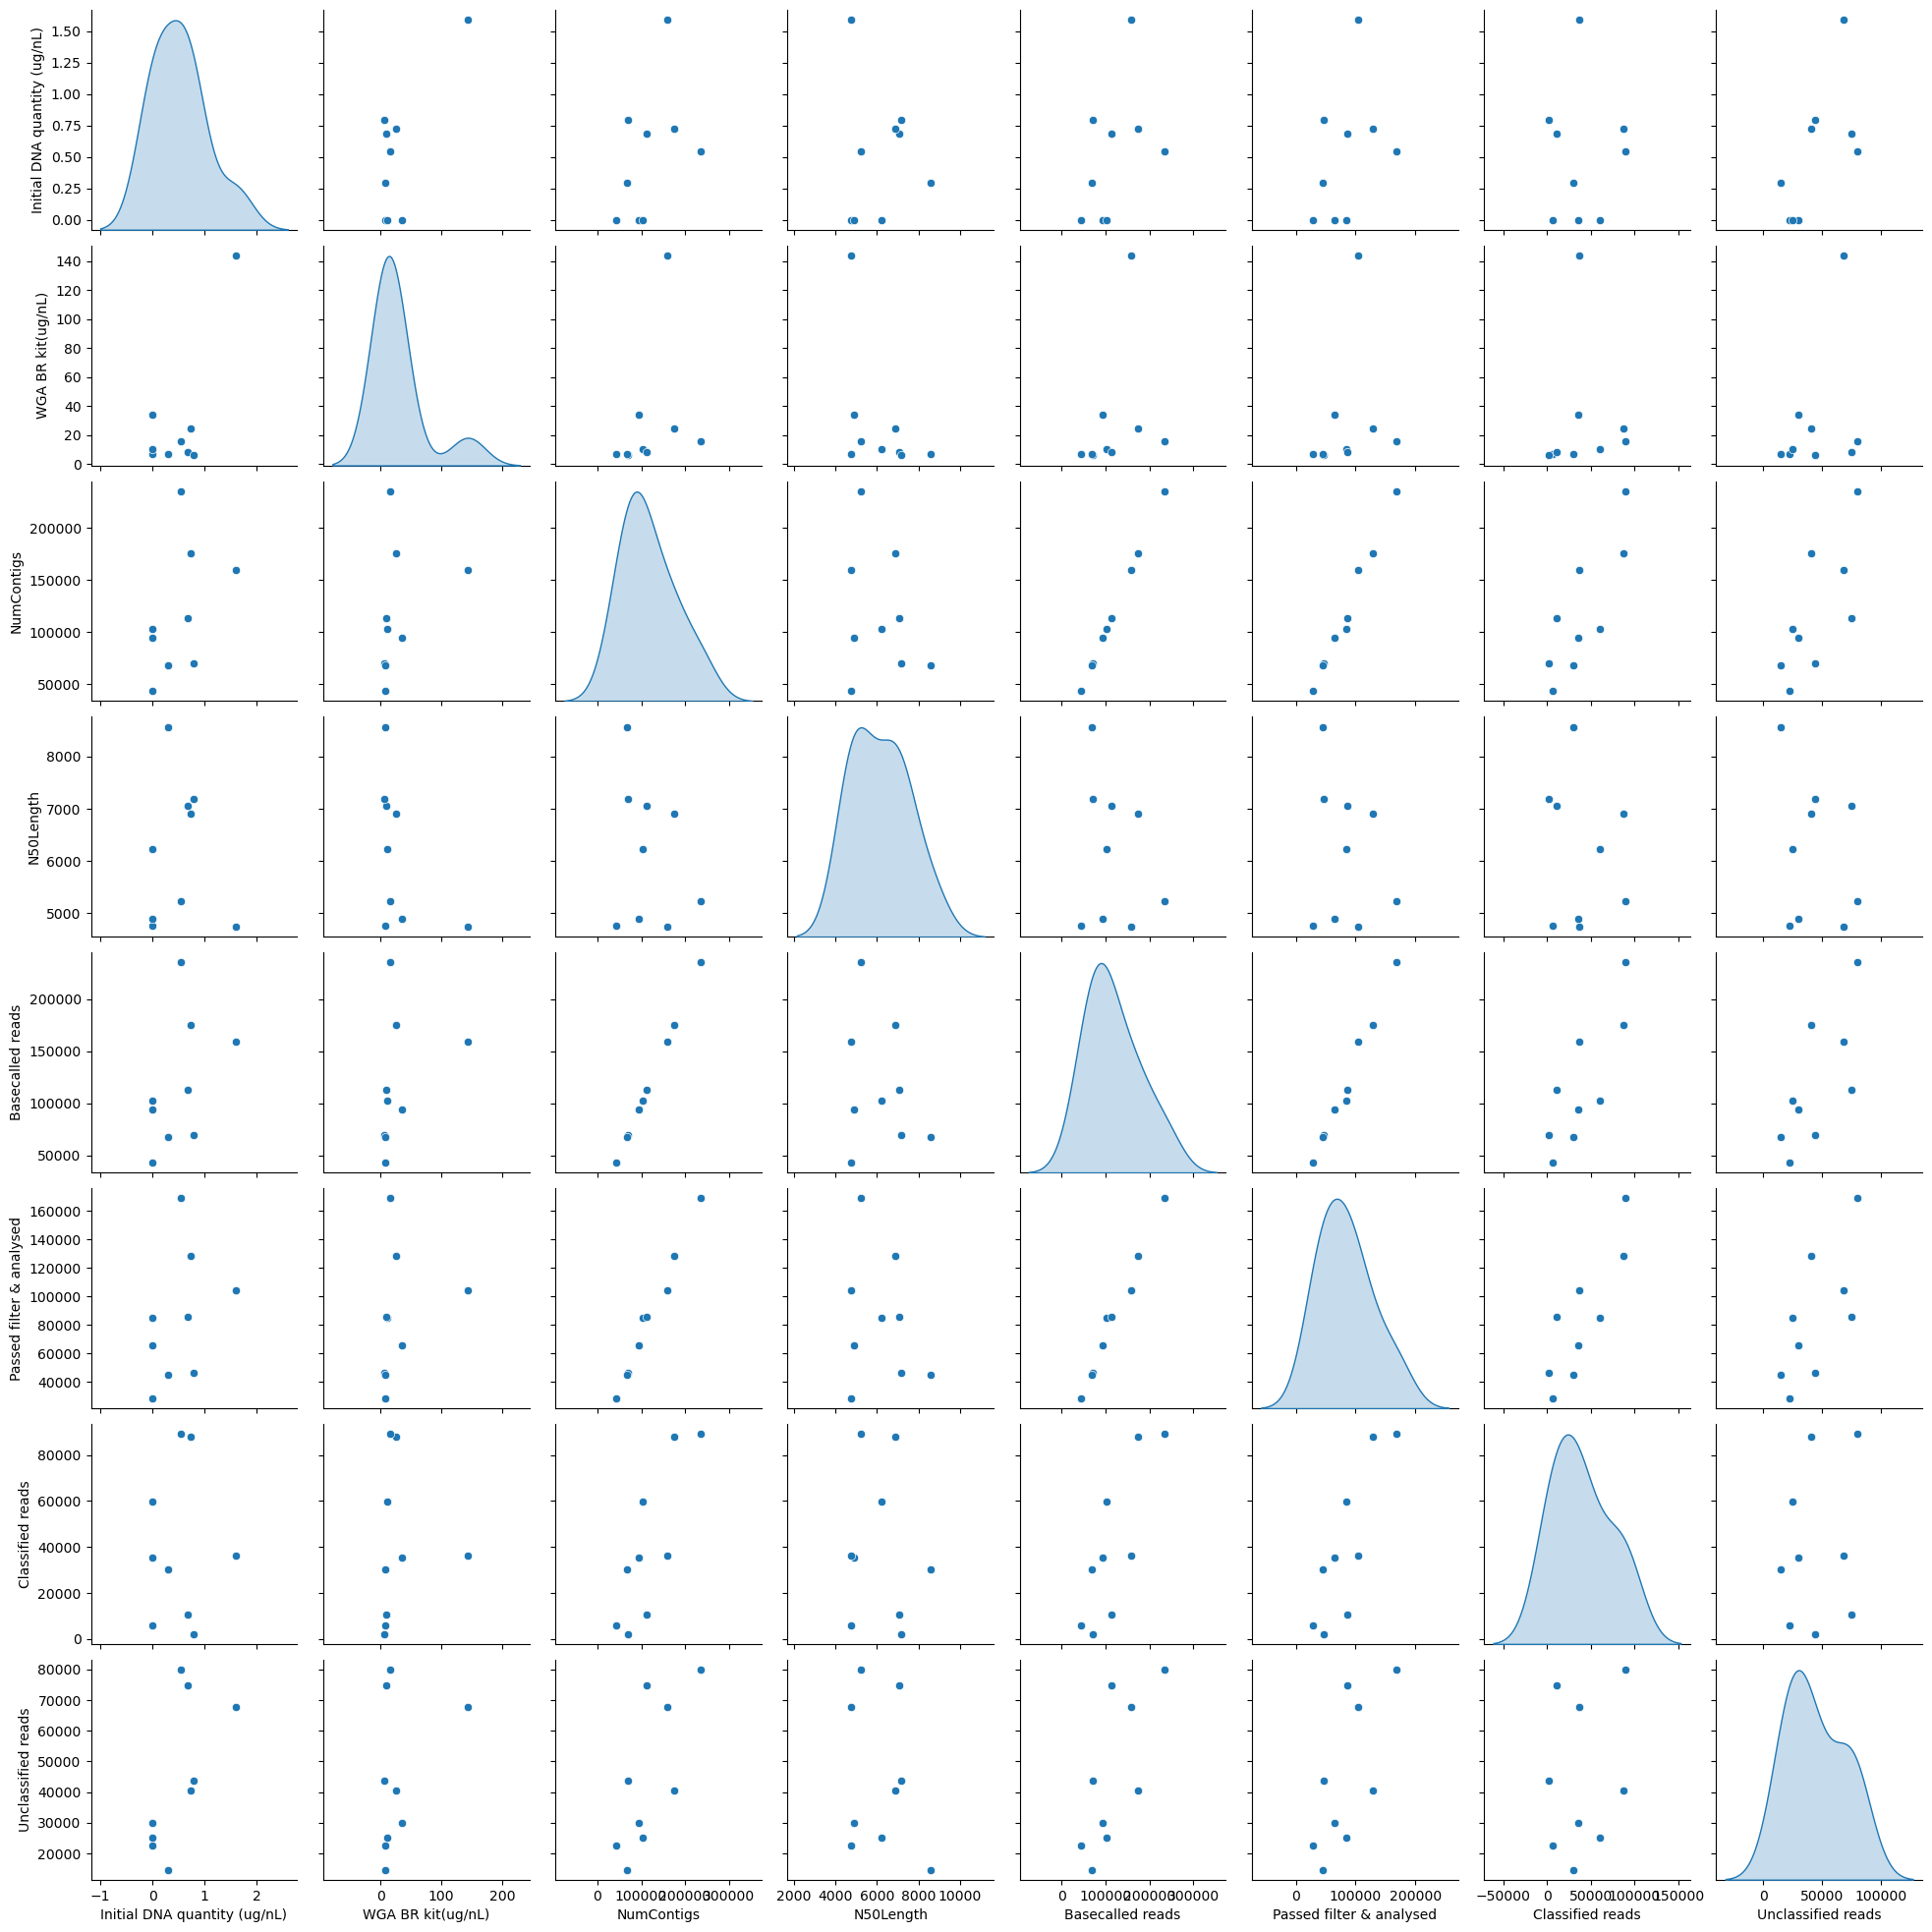

In [5]:
#refine to where I expect a relationship
ref_meta = meta[['Initial DNA quantity (ug/nL)', 'WGA BR kit(ug/nL)', 'NumContigs', 'N50Length','Basecalled reads' ,'Passed filter & analysed', 'Classified reads', 'Unclassified reads']]
# Create pairplot
sns.pairplot(ref_meta, kind='scatter', diag_kind='kde')